# MTH9879 Homework 1
#### ShengQuan Zhou

Assigned: January 31, 2017.
Due: February 14, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

Answer: (1) The algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010 is called the <i>constant participation rate</i> strategy of splitting the order.

(2) The <i>constant participation rate</i> strategy of splits the order in such a way that each child order represents a fixed fraction of the total trading volume over a given period of time, say a minute. That is, it calls for larger trades if overall volume increases. This is a problem when the parent order is relatively large, as the sub-orders themselves can give a false impression of large volume, forming a dynamics of positive feedback and accelerating the main order's execution. A large sell order reduces the market's liquidity by causing a sharp price drop.

(3) The trading strategy could have been amended to be contingent on the execution price received, for example, trading less as the price impact increases.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

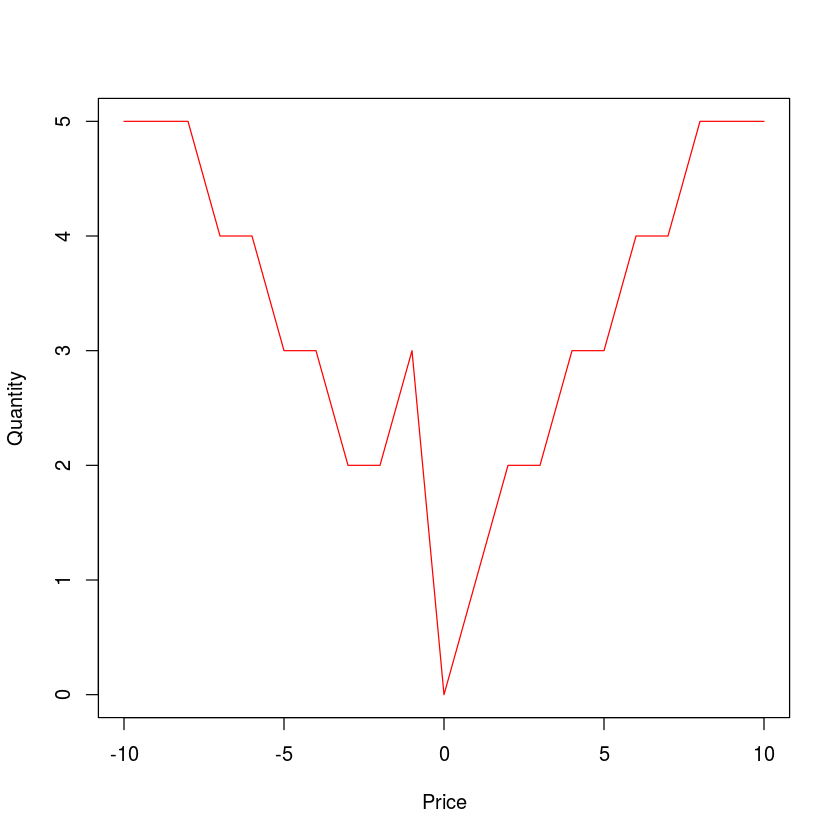

In [4]:
# R version 3.3.2 (2016-10-31)
logging <- F
alpha <- 1
mu <- 10
delta <- 1.0/5.0 
initializeBook5()
limitBuyOrder(price = bestBid())
limitBuyOrder(price = bestBid())
bookPlot(10)

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### Solution (a): 

In [75]:
alphaList <- c(1,1,1,1)
muList <- c(10,8,10,10)
deltaList <- c(1/5, 1/5, 1/6, 1/8)
bookShapeList <- c()
for ( i in 1:4) 
{
    alpha <- alphaList[i]
    mu <- muList[i]
    delta <- deltaList[i]
    initializeBook5()
    
    # Burn in for 100 events
    for(count in 1:100)
    {
        generateEvent()
    }
    
    numEvents <- 100000 # Average over 100,000 events
    avgBookShape <- bookShape(20)/numEvents

    for(count in 2:numEvents)
    {
        generateEvent()
        avgBookShape <- avgBookShape+bookShape(20)/numEvents
    }
    
    bookShapeList[[i]] <- avgBookShape
}

### Solution (b):  a summary plot of the average book shapes

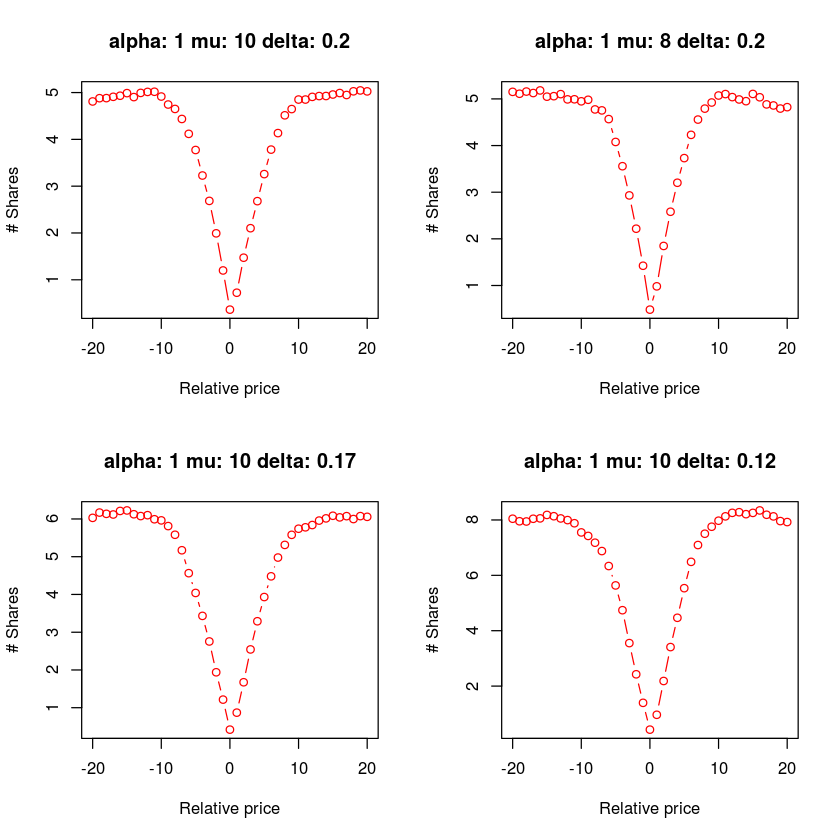

In [78]:
par(mfrow=c(2,2)) ##combine the result
for ( i in 1:4) 
{    
    alpha <- round(alphaList[i],2)
    mu <- round(muList[i],2)
    delta <- round(deltaList[i],2)
    plot(-20:20,bookShapeList[[i]],main=paste("alpha:",alpha,"mu:",mu,"delta:",delta ),xlab="Relative price",ylab="# Shares", col="red", type="b")
}

### Solution (c)-(d):  estimation of the slope and the asymptotic book depths

In [80]:
estimatedSlopes <- c()
estimatedDepths <- c()
simulatedSlopes <- c()
simulatedDepths <- c()
for (i in 1:4) 
{    
    alpha <- round(alphaList[i],2)
    mu <- round(muList[i],2)
    delta <- round(deltaList[i],2)
    
    estimatedSlopes<-c(estimatedSlopes,alpha^2/mu/delta)
    estimatedDepths<-c(estimatedDepths,alpha/delta)
    
    theBookShape <- bookShapeList[[i]]
    simulatedSlopes<-c(simulatedSlopes,mean(abs(diff(theBookShape))[16:25]))
    simulatedDepths<-c(simulatedDepths,mean(theBookShape[c(1:5,37:41)])) ##5 points at each side 
}

testSet=c("I","II","III","IV")
table=data.frame(testSet,simulatedSlopes,estimatedSlopes,simulatedDepths,estimatedDepths)
table

testSet,simulatedSlopes,estimatedSlopes,simulatedDepths,estimatedDepths
I,0.630529,0.5000000,4.944238,5.000000
II,0.684294,0.6250000,5.011931,5.000000
III,0.713276,0.5882353,6.090713,5.882353
IV,1.031780,0.8333333,8.058726,8.333333


### The following code sets up the data required for Problem 4.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [4]:
nrow(data.frame(ziSimResults))

[1] 10000

In [5]:
ncol(data.frame(ziSimResults))

[1] 20

In [3]:
head(data.frame(ziSimResults))

bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


 (a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

### (a) 

I'm not sure about what "after 100 events from 10,000 simulations" mean in the problem statement. This 100 events is possibly a burn-in or warm-up number of events, while 10,000 is the real simulation events.

The data frame has 20 columns, corresponding to 10 pairs of bid and ask prices. Here we assume that each pair of bid and ask columns corresponds to one initial configuration. In other words, the first pair of bid and ask columns corresponds to initial configuration $q_b=1, q_a=1$; the second pair of bid and ask columns corresponds to initial configuration $q_b=2, q_a=1$; etc.

The data frame as 10,000 rows. I guess this is related to the "10,000 simulations" in the problem statement.

In [36]:
meanMidPrice<-c()
standardDeviation<-c()
numOfCases <- ncol(data.frame(ziSimResults))/2
for (i in 1:numOfCases)
{
    midPrice <- (ziSimResults[[i]]$bid + ziSimResults[[i]]$ask)/2
    meanMidPrice <- c(meanMidPrice,mean(midPrice))
    standardDeviation <- c(standardDeviation,sd(midPrice))
}

### (b) Plot of mean mid price versus initial shares at the bid side

Standard Error is standard deviation divided by $\sqrt{N}$, where $N=10000$ is the number of simulation events.

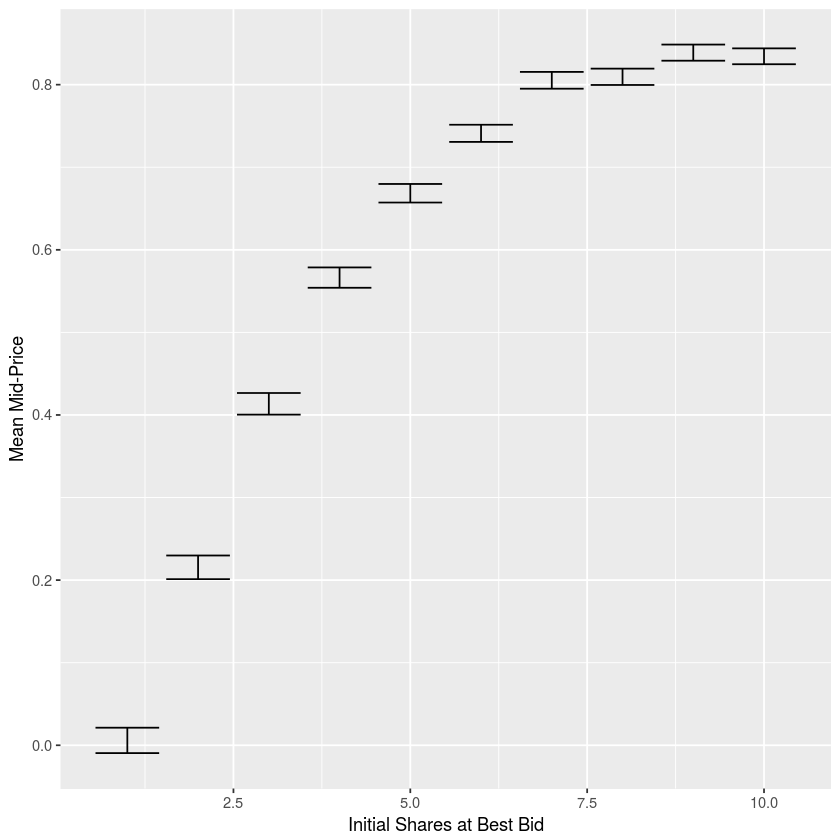

In [41]:
standardError=standardDeviation/sqrt(nrow(data.frame(ziSimResults)))
library(ggplot2)
ggplot(NULL,aes(x=1:numOfCases,y=meanMidPrice))+geom_errorbar(aes(ymin=meanMidPrice-standardError,ymax=meanMidPrice+standardError))+xlab("Initial Shares at Best Bid")+ylab("Mean Mid-Price")

### (c) Plot of mean mid price versus imbalance

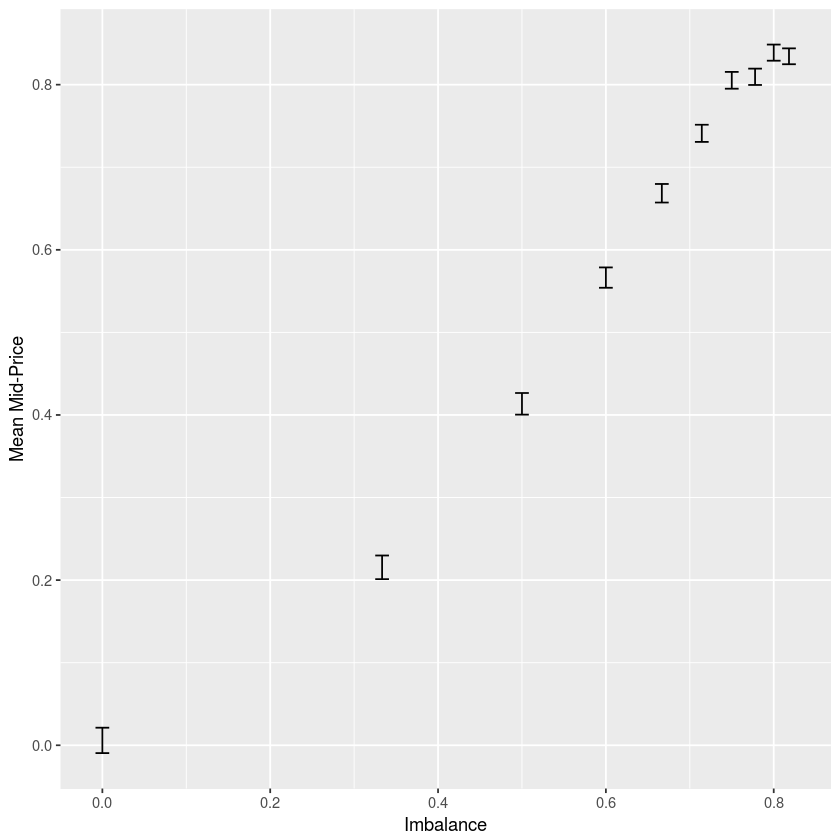

In [42]:
ggplot(NULL,aes(x=(1:numOfCases-1)/(1:numOfCases+1),y=meanMidPrice))+geom_errorbar(aes(ymin=meanMidPrice-standardError,ymax=meanMidPrice+standardError))+xlab("Imbalance")+ylab("Mean Mid-Price")

### (d) 

If you see an order book with large quantity at the bid and small quantity at the offer, the future price will increase.

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

Answer: In brief, a stochastic process $X_t$ is a martingale if $\mathbb{E}[X_t|\mathcal{F}_s]=X_s$ for $s<t$, where the expectation is conditioned on $\mathcal{F}_t$, the $\sigma$-algebra filtration associated with the information available up to time $t$. However, the key notion <i>information</i> here in the context of derivative pricing
- includes the price history of the underlying asset realized in an equilibrated market;
- does NOT include the history of order book dynamics at each instant before an equilibrium is reached.

In this sense, yes, the asset prices are martingales if your trading strategy is based on the coarse-grained information associated with the equilibrium price history only. However, if more granular historical information about the out-of-equilibrium dynamics of the order book is available, the asset prices are no longer martingales.

An analogy with physics: imagine the phenomena of Brownian motion - the movement of pollen particle in a water environment as an analogy for asset price. If the water is in thermal and mechanical equilibrium, the movement of the pollen driven by the water molecules has no specific direction, a prototype of random walk. This is an example of martingale. However, if there is disturbance, say a pressure gradient, to the water environment that breaks the equilibrium state, the pollen will move in preferred direction given by the pressure gradient and its movement is no longer a martingale until the equilibrium is restored.
